In [ ]:
!pip install ctgan
!pip install table_evaluator

In [1]:
# import the library we will use
from table_evaluator import TableEvaluator
from ctgan import CTGANSynthesizer
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# import the dataset
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [3]:
dataset = pd.read_csv('adult.csv', sep=',')
raw_X = dataset.iloc[:,:14]
y = dataset.iloc[:,14]
with pd.option_context('display.max_colwidth', None):
  display(raw_X)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [4]:
# Identifies all the discrete columns
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native-country',
]
ctgan = CTGANSynthesizer(epochs=5)
ctgan.fit(raw_X, discrete_columns)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

In [5]:
#sample the synthetic data
synthetic_data = ctgan.sample(dataset.shape[0])
with pd.option_context('display.max_colwidth', None):
  display(synthetic_data)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,19,State-gov,239804,HS-grad,4,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,-29,-1,32,Haiti
1,39,?,97633,5th-6th,12,Never-married,Prof-specialty,Wife,White,Female,-51,-2,40,Philippines
2,35,Self-emp-not-inc,255228,5th-6th,12,Never-married,Handlers-cleaners,Husband,White,Female,-19,0,39,Greece
3,23,Private,49073,Preschool,5,Married-civ-spouse,Prof-specialty,Own-child,White,Male,-105,-2,71,United-States
4,25,Federal-gov,221141,10th,13,Married-AF-spouse,Prof-specialty,Not-in-family,White,Male,-70,0,7,Columbia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,66,Private,345420,10th,8,Married-civ-spouse,Exec-managerial,Husband,Amer-Indian-Eskimo,Male,-26,2,57,United-States
48838,37,Federal-gov,30264,HS-grad,14,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,-83,-1,69,United-States
48839,34,State-gov,116635,Doctorate,12,Separated,Other-service,Own-child,Black,Female,-70,-3,39,United-States
48840,45,Private,33520,10th,12,Married-civ-spouse,Transport-moving,Husband,Black,Male,-57,4,40,Trinadad&Tobago


In [ ]:
# do some preprocessing, covert the category variable into dummy variable
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for discrete_column in discrete_columns:
  raw_X[discrete_column] = lb_make.fit_transform(raw_X[discrete_column])
  synthetic_data[discrete_column] = lb_make.fit_transform(synthetic_data[discrete_column])

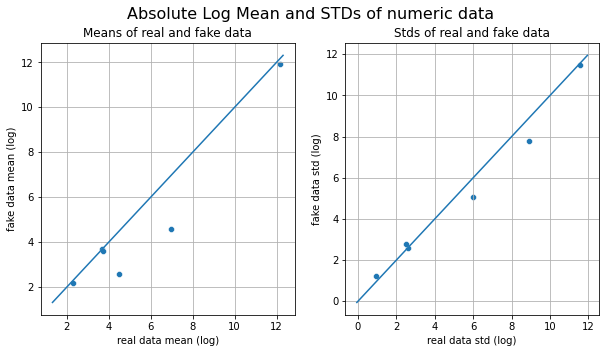

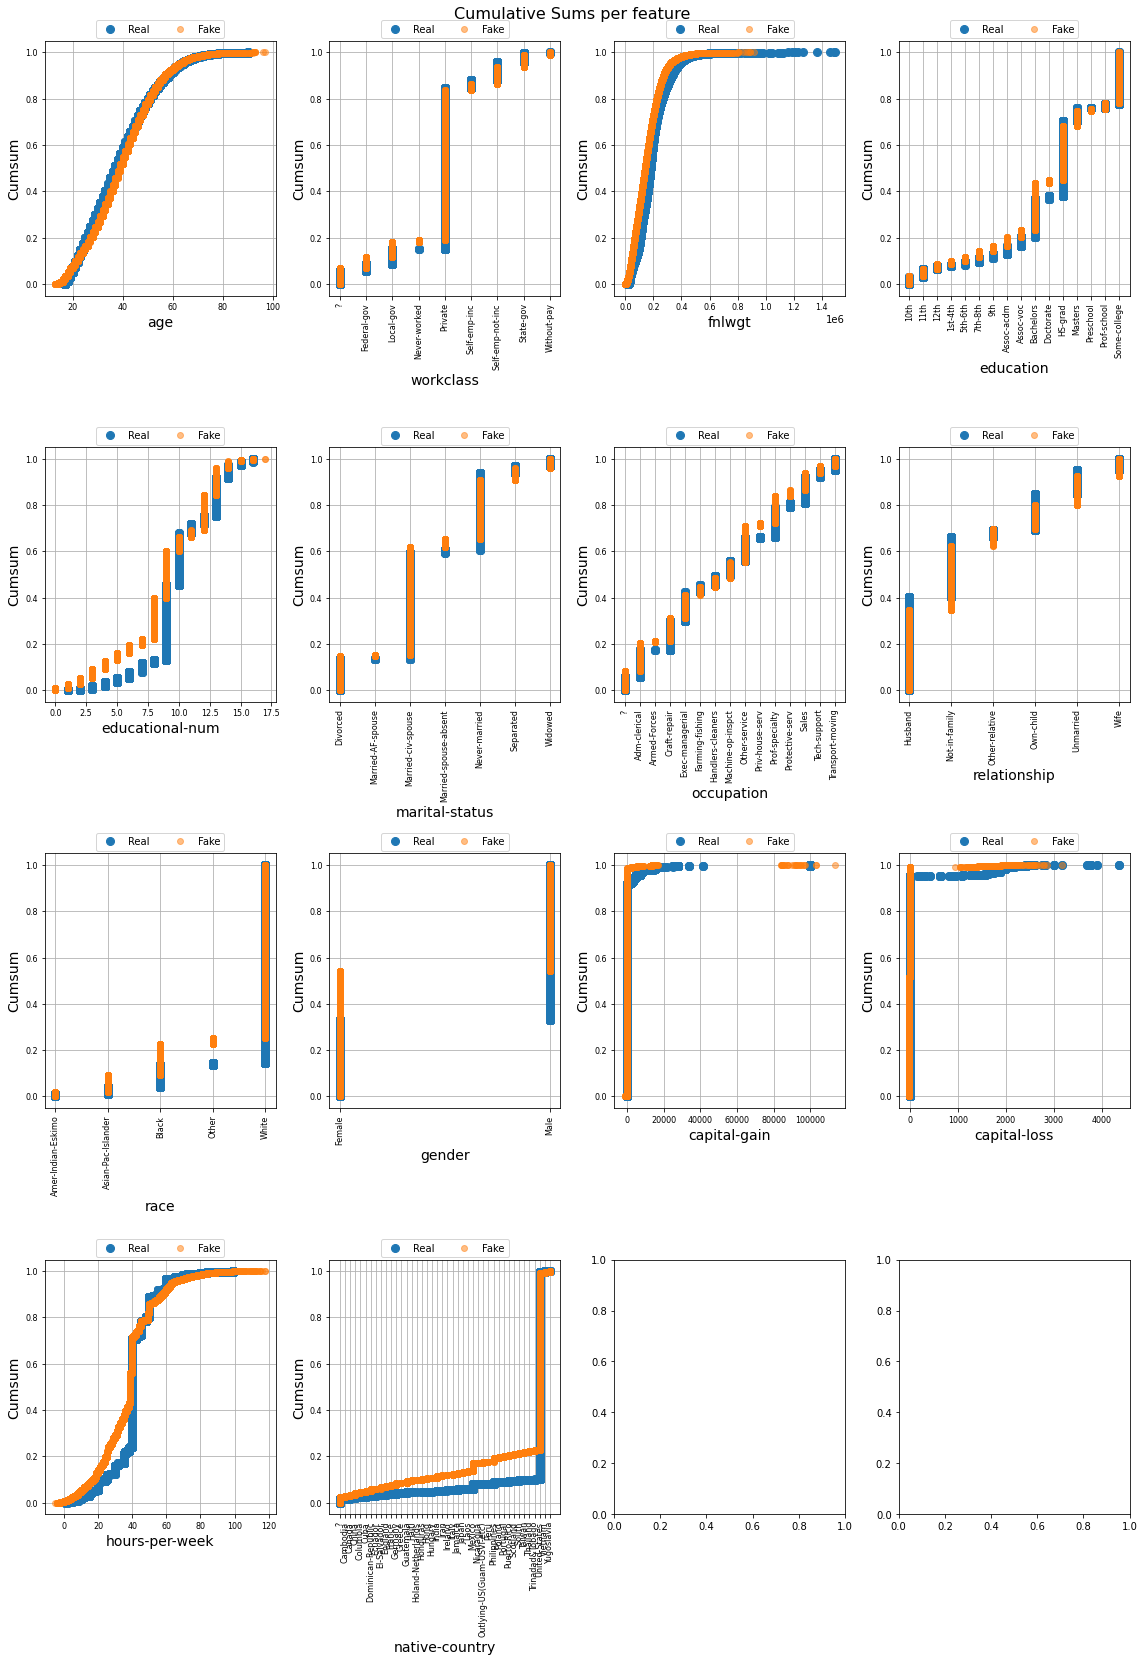

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

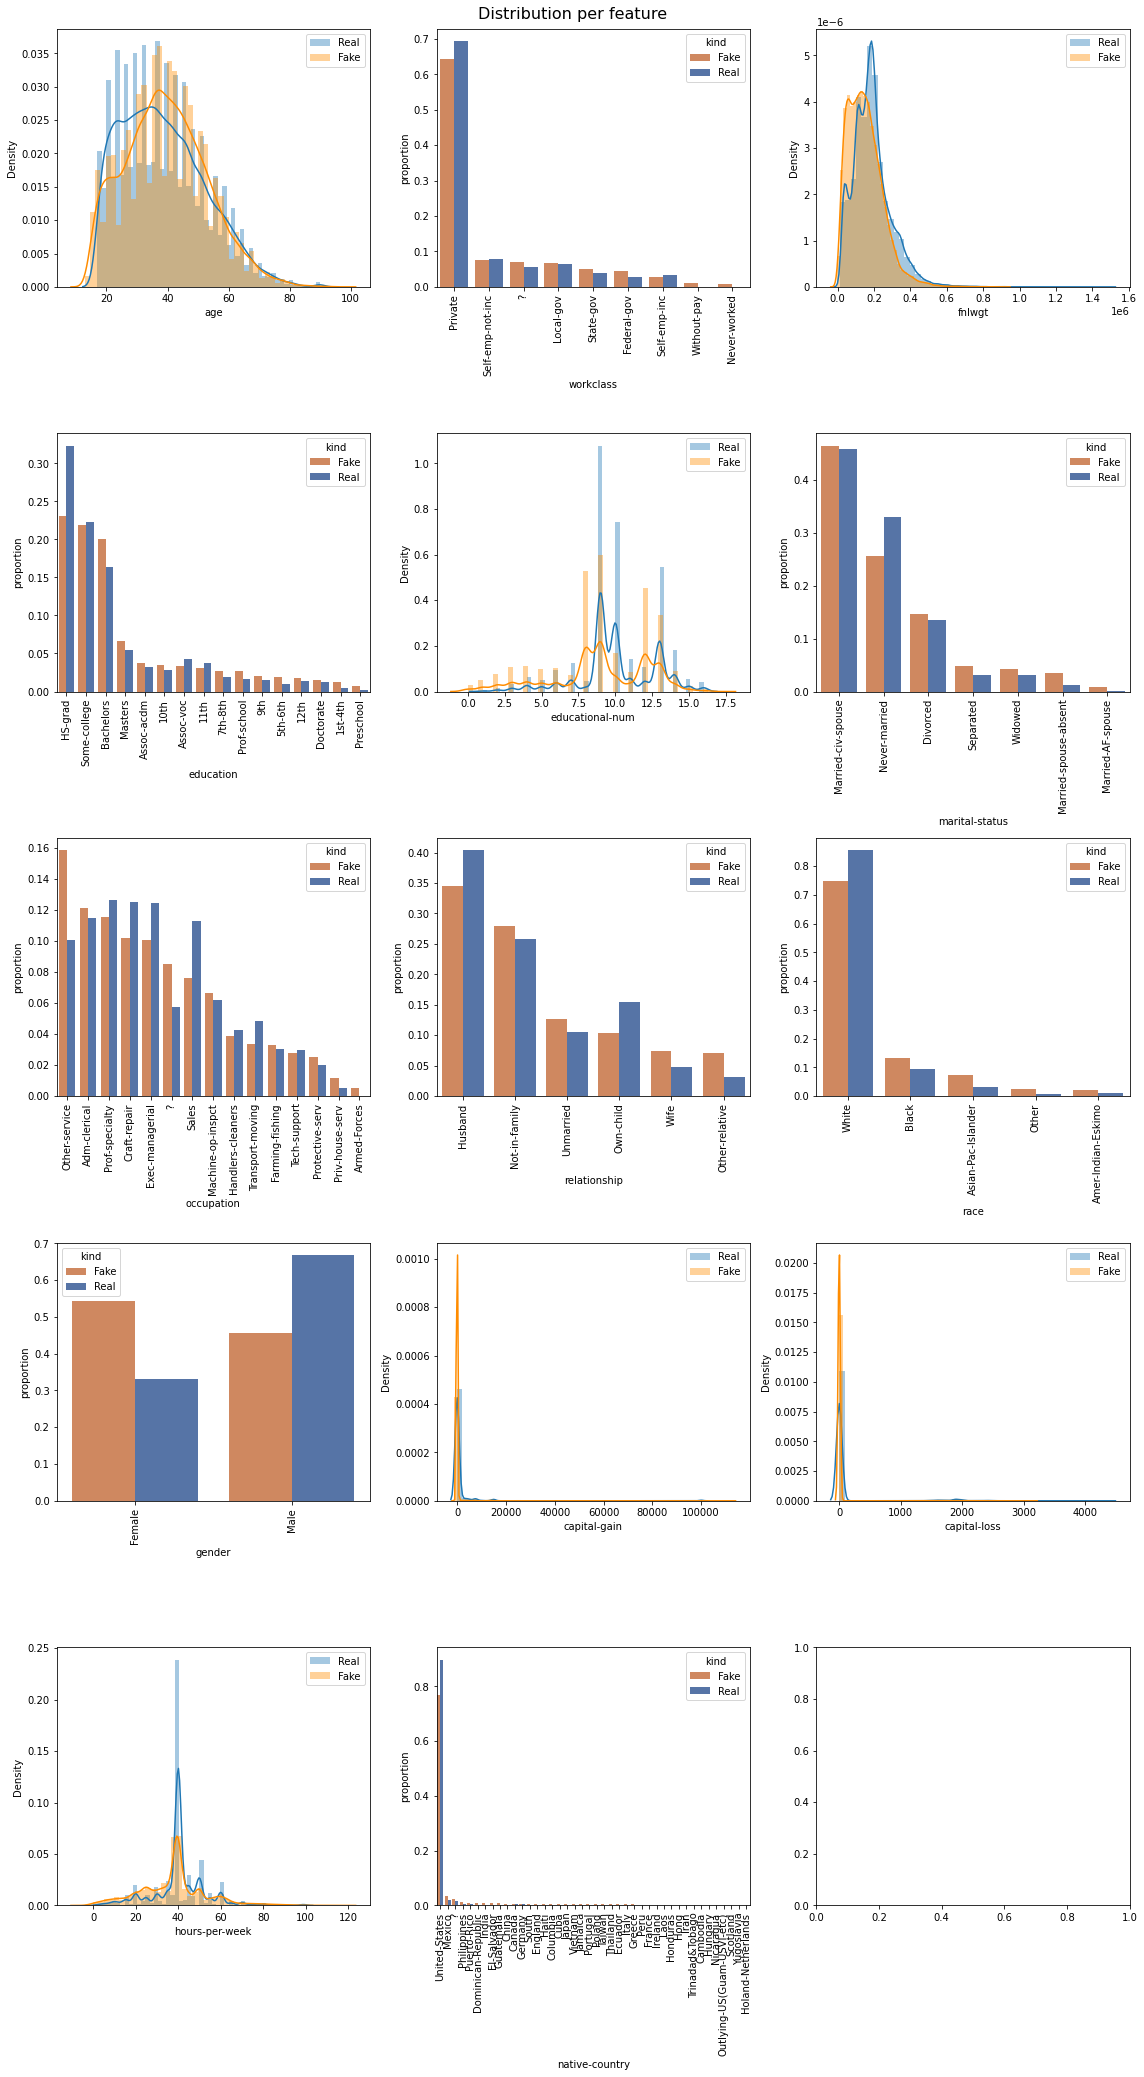

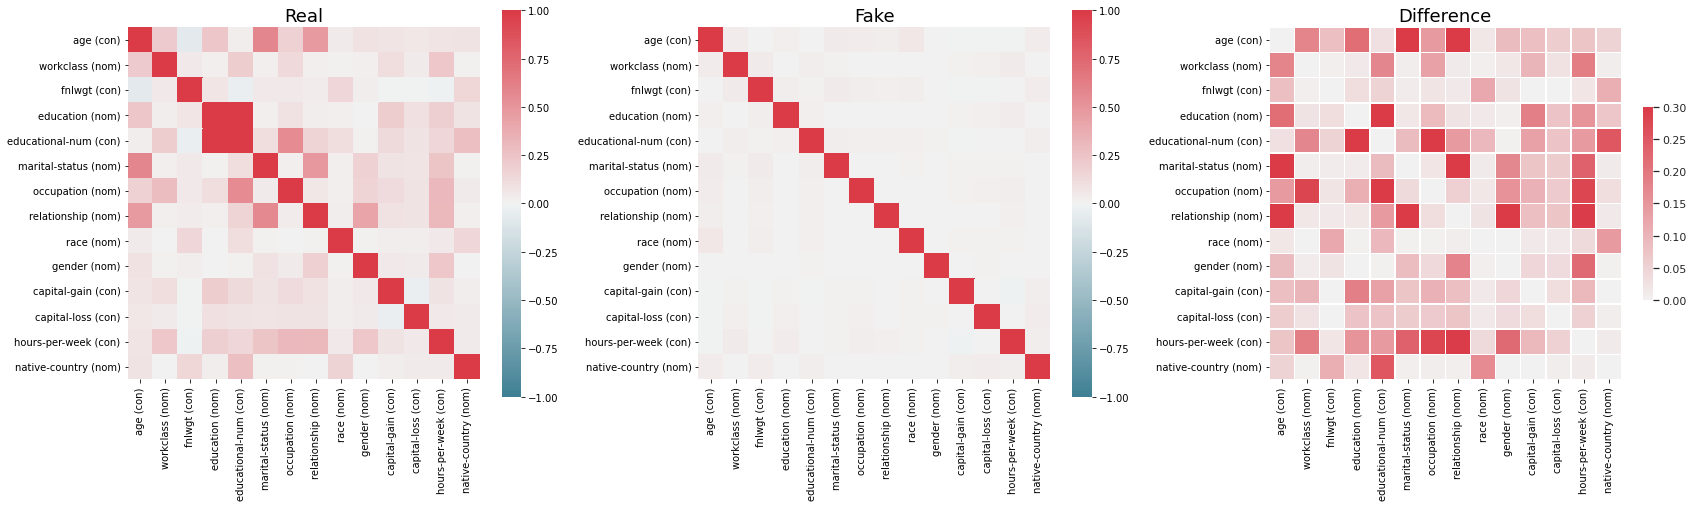

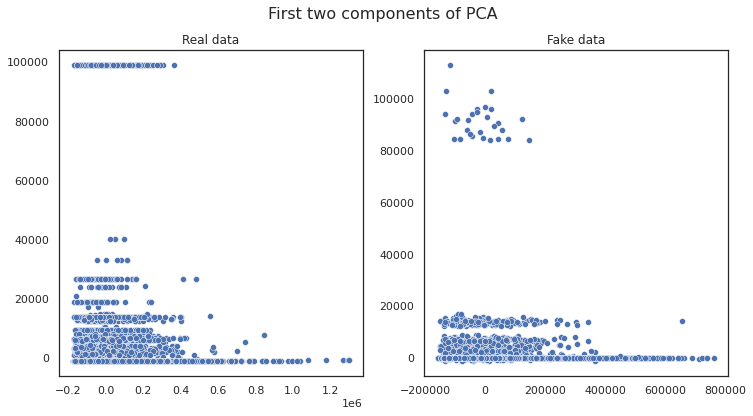

In [6]:
# table evaluation
table_evaluator = TableEvaluator(raw_X, synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(raw_X,y,test_size = 0.25,random_state = 3)
S_X_train, S_X_test, S_y_train, S_y_test = train_test_split(synthetic_data,y,test_size = 0.25,random_state = 3)

In [ ]:
# using Decision tree to predict
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy', random_state = 3)
classifier.fit(X_train, y_train)
# Predict the test set
y_pred = classifier.predict(X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Decision Tree: Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Decision Tree: Cofusion Matrix for raw data
[[8210 1100]
 [1106 1795]]
The accuracy is: 81.93%


In [ ]:
# using Decision tree to predict
classifier = DecisionTreeClassifier(criterion ='entropy', random_state = 3)
classifier.fit(S_X_train, S_y_train)
# Predict the test set
S_y_pred = classifier.predict(S_X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(S_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Decision Tree: Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Decision Tree: Cofusion Matrix for synthetic data
[[6984 2326]
 [2182  719]]
The accuracy is: 63.08%


In [ ]:
# using logistic regression to predict
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, y_train)
# Predict the test set
y_pred = classifier.predict(X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Logistic Regression: Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Logistic Regression: Cofusion Matrix for raw data
[[8818  492]
 [2062  839]]
The accuracy is: 79.08%


In [ ]:
# using logistic regression to predict
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, y_train)
# Predict the test set
S_y_pred = classifier.predict(S_X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(S_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Logistic Regression: Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Logistic Regression: Cofusion Matrix for synthetic data
[[7353 1957]
 [2298  603]]
The accuracy is: 65.15%


In [ ]:
# using Naive Bayes to predict
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predict the test set
y_pred = classifier.predict(X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Naive Bayes: Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Naive Bayes: Cofusion Matrix for raw data
[[8834  476]
 [2005  896]]
The accuracy is: 79.68%


In [ ]:
# using Naive Bayes to predict
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predict the test set
S_y_pred = classifier.predict(S_X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(S_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Naive Bayes: Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Naive Bayes: Cofusion Matrix for synthetic data
[[7236 2074]
 [2264  637]]
The accuracy is: 64.47%
